## seaborn

<div align="center">
   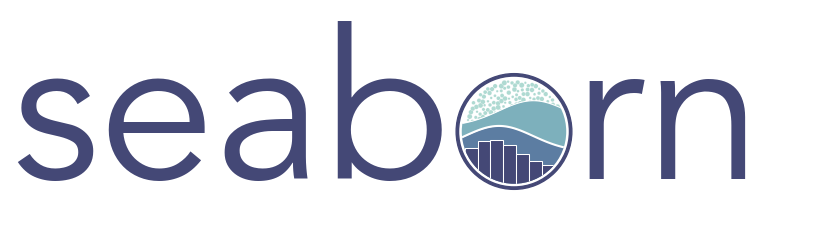
</div>

**seaborn** es una librería de visualización de datos para Python desarrollada sobre **matplotlib**. Ofrece una interfaz de alto nivel para la creación de gráficas. Además, está integrada con las estructuras de datos de **pandas**, lo que permite utilizar el nombre de los **DataFrames** y campos directamente como argumentos de las funciones de visualización.

Para instalar **seaborn** podemos ejecutar la siguiente linea en la terminal de **Anaconda**:
```
pip install seaborn
```

Si queremos la última versión podemos ejecutar:
```
pip install -U seaborn
```

Por lo general, al importar la librería **seaborn** se abrevia como **sns**.



|Función              | Plot                                                                                                                              |
|---------------------|-----------------------------------------------------------------------------------------------------------------------------------|
|**sns.barplot()**    | Crea un gráfico de barras con el promedio de los valores.                                                                         |
|**sns.countplot()**  | Crea un grafico de barras con el conteo de cada categoria. (_plt.bar()_)                                                          |
|**sns.histplot()**   | Crea un histograma. (_plt.hist()_)                                                                                                |
|**sns.scatterplot()**| Crea un scatterplot. (_plt.scatter()_)                                                                                            |
|**sns.jointplot()**  | Crea graficos de dispersión con histogramas.                                                                                      |
|**sns.kdeplot()**    | Crea graficos de densidad de probabilidad de la curva continua de los datos.                                                      |
|**sns.boxplot()**    | Crea graficos de caja. (_plt.boxplot()_)                                                                                          |
|**sns.violinplot()** | Crea graficos de violin. (_plt.violinplot()_)                                                                                     |
|**sns.heatmap()**    | Crea mapas de calor.                                                                                                              |
|**sns.FacetGrid()**  | Genera una matriz de graficas filtrando por las columnas y filas del **DataFrame** y aplicando una misma grafica a toda la matriz.|
|**sns.pairplot()**   | Crea una matriz de graficas, en la diagonal aparece el **histograma** y en los demás una gráfica de **dispersión**.               |



In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")

In [ ]:
# Usaremos el DataFrame de CO2 Emissions para los ejemplos

df = pd.read_csv("../Data/co2_emissions.csv")

df.head(3)

### sns.barplot()

In [ ]:
# x = varible categorica
# y = variable numérica

sns.barplot(x = "Fuel Type", y = "CO2 Emissions", data = df)
plt.show()

In [ ]:
# La altura de cada barra es la media de cada categoria

df.groupby(by = "Fuel Type", as_index = False).agg({"CO2 Emissions" : "mean"})

In [ ]:
# Otra forma de usar los parámetros

sns.barplot(x = df["Fuel Type"], y = df["CO2 Emissions"])
plt.show()

In [ ]:
# Con "order" podemos elegir el orden en el que aparecen

sns.barplot(x = "Fuel Type", y = "CO2 Emissions", data = df,
            order = ["Natural Gas", "Ethanol (E85)", "Prm. Gasoline", "Reg. Gasoline", "Diesel"]) 
plt.show()

In [ ]:
plt.figure(figsize = (10, 6))

sns.barplot(x = "Model Year", y = "CO2 Emissions", hue = "Fuel Type", data = df[df["Model Year"] < 2000], palette = "rainbow")

plt.show()

In [ ]:
df[df["Model Year"] < 2000].groupby(["Fuel Type", "Model Year"], as_index = False)["CO2 Emissions"].mean()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "Model Year", y = "CO2 Emissions", hue = "Fuel Type", data = df[df["Model Year"] < 2000], palette = "rainbow")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x = "CO2 Emissions", y = "Fuel Type", hue = "Model Year", data = df[df["Model Year"] < 2000], palette = "rainbow")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "Model Year", y = "CO2 Emissions", hue = "Fuel Type", data = df[df["Model Year"] < 2000], palette = "rainbow")

ax.legend_.remove()
plt.show()

### sns.countplot()

**sns.countplot()** es la función **plt.bar()** de **matplotlib**.

In [ ]:
df["Fuel Type"].value_counts()

In [ ]:
plt.figure(figsize = (8, 6))

sns.countplot(x = df["Fuel Type"])

plt.show() 

In [ ]:
# El número dentro del color_palette se utiliza para elegir el número de colores
sns.countplot(x         = df["Fuel Type"],
              facecolor = (0.9, 0.9, 0.9),
              linewidth = 1,
              edgecolor = sns.color_palette("rainbow", 3))
plt.show()

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "Fuel Type", hue = "Model Year", data = df[df["Model Year"] < 2000], palette = "Blues_r")
plt.show()

### Histogramas

**sns.histplot()**

In [ ]:
sns.histplot(df["CO2 Emissions"])
plt.show()

In [ ]:
sns.histplot(df["CO2 Emissions"], color = "green", kde = True)
plt.show()

In [ ]:
sns.histplot(df["Fuel Consumption City"], color = "green", bins = 50)
plt.show()

### Scatter Plots (graficos de dispersión) 
**sns.scatterplot()**

In [ ]:
sns.scatterplot(x = df["Fuel Consumption City"], y = df["CO2 Emissions"])
plt.show()

### Joint Plots
**sns.jointplot()**

In [ ]:
sns.jointplot(x = df["Fuel Consumption City"], y = df["CO2 Emissions"])
plt.show()

### sns.kdeplot()

**Kernel Density Estimate (KDE)** nos permite estimar la función de densidad de probabilidad de la curva continua (o no paramétrica) de nuestro conjunto de datos en una o más dimensiones.

En otras palabras, es un método para la visualización de las distribución de los **patrones** u **observaciones** del dataset, es análogo a un histograma.

In [ ]:
sns.kdeplot(x = df["Fuel Consumption City"],
            y = df["CO2 Emissions"])
plt.show()

In [ ]:
sns.kdeplot(x = df["Fuel Consumption City"],
            y = df["CO2 Emissions"],
            shade = True, 
            n_levels = 6)
plt.show()

In [ ]:
sns.kdeplot(x = df["Fuel Consumption City"],
            y = df["CO2 Emissions"],
            shade = True, 
            n_levels = 3)
plt.show()

### sns.boxplot() y sns.violinplot()

In [ ]:
sns.boxplot(x = df["Fuel Type"],
            y = df["CO2 Emissions"])

plt.show()

In [ ]:
sns.violinplot(x = df["Fuel Type"],
            y = df["CO2 Emissions"])

plt.show()

In [ ]:
plt.subplots(figsize = (12, 8))

sns.boxplot(x = "Fuel Type",
            y = "CO2 Emissions",
            hue = "Model Year",
            data = df[df["Model Year"] < 2000],
            palette = "Blues")
plt.show()

### sns.heatmap()

Mapas de calor.

In [ ]:
df[["Fuel Consumption City", "Cylinders", "CO2 Emissions"]].corr()

In [ ]:
sns.heatmap(data = df[["Fuel Consumption City", "Cylinders", "CO2 Emissions"]].corr())
plt.show()

In [ ]:
sns.heatmap(data = df[["Fuel Consumption City", "Cylinders", "CO2 Emissions"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [ ]:
sns.heatmap(data = df._get_numeric_data().corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [ ]:
################################################################################################################################